In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
X_, x_val_, Y_, y_val_ = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

In [12]:
def mlp_activation(X,Y,X_val,Y_val,epochs,x_test,y_test):
    functions=['relu','logistic','tanh','identity']
    for i in functions:
        loss=[]
        v_loss=[]
        mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation=i, solver='adam', random_state=1)
        for e in range(epochs):
            mlp.partial_fit(X.reshape(51000,784), Y, classes=np.unique(Y))
            
            loss.append(log_loss(Y,mlp.predict_proba(X.reshape(51000,784))))
            
            v_loss.append(log_loss(Y_val,mlp.predict_proba(X_val.reshape(9000,784))))
        plt.plot(range(epochs),loss,label='train_loss')
        plt.plot(range(epochs),v_loss,label='validation_loss')
        plt.legend()
        plt.title('Loss for activation function '+i)
        plt.show()
        print("Tranning Accuracy Score",metrics.accuracy_score(Y, mlp.predict(X.reshape(51000,784))))
        print("Validation Accuracy Score",metrics.accuracy_score(Y_val, mlp.predict(X_val.reshape(9000,784))))
        print("testing Accuracy Score",metrics.accuracy_score(y_test,mlp.predict(x_test.reshape(10000,784))))

            

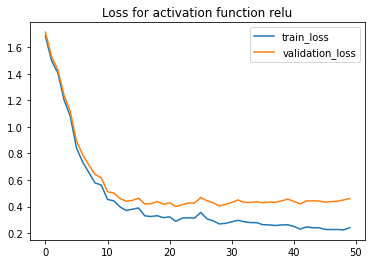

Tranning Accuracy Score 0.9117254901960784
Validation Accuracy Score 0.8643333333333333
testing Accuracy Score 0.8611


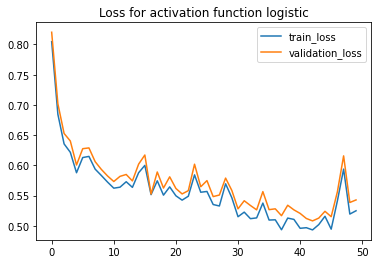

Tranning Accuracy Score 0.805156862745098
Validation Accuracy Score 0.798
testing Accuracy Score 0.7877


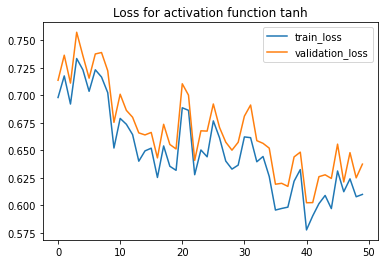

Tranning Accuracy Score 0.7764313725490196
Validation Accuracy Score 0.7652222222222222
testing Accuracy Score 0.7597


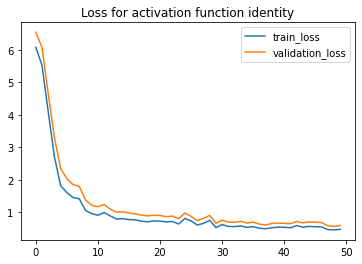

Tranning Accuracy Score 0.8441372549019608
Validation Accuracy Score 0.8241111111111111
testing Accuracy Score 0.8202


In [13]:
mlp_activation(X_,Y_,x_val_,y_val_,50,x_test,y_test)

The best activation function is <b>Relu</b> as you can see from the above plots and Accuracies for Tranning,Validation and Testing sets all best when relu is used.
The Reason for the same is because Relu does not activate all the neurons.
When the linear transformation output is negative it does not activate the neuron.

In [16]:
def mlp_lrate(X,Y,X_val,Y_val,epochs,x_test,y_test):
    l_rte=[0.0001,0.001,0.01]
    for i in l_rte:
        loss=[]
        v_loss=[]
        mlp = MLPClassifier(hidden_layer_sizes=(256,32), activation='relu', solver='adam', random_state=1,learning_rate_init=i)
        for e in range(epochs):
            mlp.partial_fit(X.reshape(51000,784), Y, classes=np.unique(Y))
            
            loss.append(log_loss(Y,mlp.predict_proba(X.reshape(51000,784))))
            
            v_loss.append(log_loss(Y_val,mlp.predict_proba(X_val.reshape(9000,784))))
        plt.plot(range(epochs),loss,label='train_loss')
        plt.plot(range(epochs),v_loss,label='validation_loss')
        plt.legend()
        plt.title('Loss for learning rate '+str(i)) 
        plt.show()
        print("Tranning Accuracy Score",metrics.accuracy_score(Y, mlp.predict(X.reshape(51000,784))))
        print("Validation Accuracy Score",metrics.accuracy_score(Y_val, mlp.predict(X_val.reshape(9000,784))))
        print("testing Accuracy Score",metrics.accuracy_score(y_test,mlp.predict(x_test.reshape(10000,784))))
            

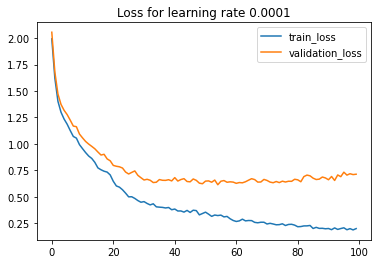

Tranning Accuracy Score 0.9218627450980392
Validation Accuracy Score 0.8585555555555555
testing Accuracy Score 0.8552


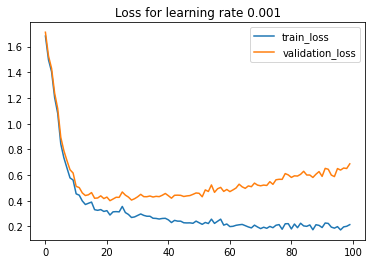

Tranning Accuracy Score 0.936
Validation Accuracy Score 0.8714444444444445
testing Accuracy Score 0.8718


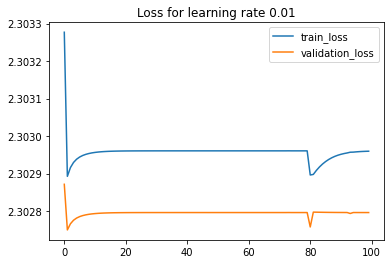

Tranning Accuracy Score 0.09998039215686275
Validation Accuracy Score 0.10011111111111111
testing Accuracy Score 0.1


In [17]:
mlp_lrate(X_,Y_,x_val_,y_val_,100,x_test,y_test)

Learning rate determines the step size at each iteration while moving toward a minimum of a loss function.
The best learning rate is <b>0.001</b>
Because if we go slower than 0.001 we do not reach the minima in 100 iterations if we use a bigger step size it will make the model converge too quickly to a suboptimal solution.
The same ca be verified with the above graphs when we use 0.0001 the accuracy is 0.92 but when we use 0.001 the accuracy increased.When we used 0.01 the accuracy decresed to 0.09

In [18]:
def mlp_layer(X,Y,X_val,Y_val,epochs,x_test,y_test):
    layers=[(256,32),(128,16),(64,8)]
    
    for i in layers:
        loss=[]
        v_loss=[]
        mlp = MLPClassifier(hidden_layer_sizes=i, activation='relu', solver='adam', random_state=1,learning_rate_init=0.001)
        for e in range(epochs):
            mlp.partial_fit(X.reshape(51000,784), Y, classes=np.unique(Y))
            
            loss.append(log_loss(Y,mlp.predict_proba(X.reshape(51000,784))))
            
            v_loss.append(log_loss(Y_val,mlp.predict_proba(X_val.reshape(9000,784))))
        plt.plot(range(epochs),loss,label='train_loss')
        plt.plot(range(epochs),v_loss,label='validation_loss')
        plt.legend()
        plt.title('Loss for layer size'+str(i))
        plt.show()
        print("Tranning Accuracy Score",metrics.accuracy_score(Y, mlp.predict(X.reshape(51000,784))))
        print("Validation Accuracy Score",metrics.accuracy_score(Y_val, mlp.predict(X_val.reshape(9000,784))))
        print("testing Accuracy Score",metrics.accuracy_score(y_test,mlp.predict(x_test.reshape(10000,784))))
            

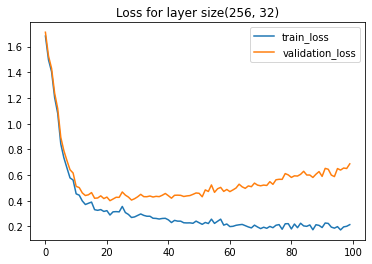

Tranning Accuracy Score 0.936
Validation Accuracy Score 0.8714444444444445
testing Accuracy Score 0.8718


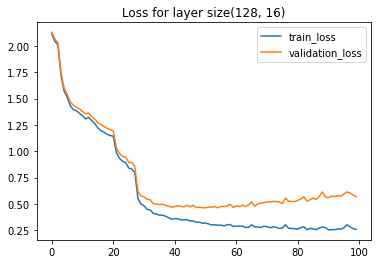

Tranning Accuracy Score 0.9113921568627451
Validation Accuracy Score 0.8598888888888889
testing Accuracy Score 0.8556


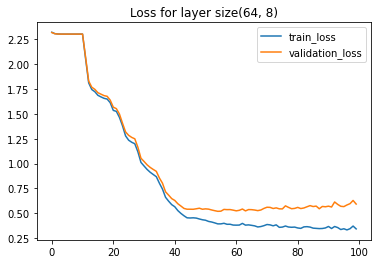

Tranning Accuracy Score 0.8836666666666667
Validation Accuracy Score 0.8464444444444444
testing Accuracy Score 0.8376


In [19]:
mlp_layer(X_,Y_,x_val_,y_val_,100,x_test,y_test)

Using too few neurons in the hidden layers will result in underfitting. Underfitting occurs when there are too few neurons in the hidden layers to adequately detect the signals in a complicated data set.
Out dataset have images (each of 28X28)which is complex dataset (with 784 feature values for each entry) and reducing the hidden layer size results in underfitting because there is a loss of data.
The best accuracy is given by <b>(256,32)</b>

In [ ]:
X, x_val, Y, y_val = train_test_split(x_train, y_train, test_size=0.8, random_state=42)
X.shape

(12000, 28, 28)

In [ ]:
from sklearn.model_selection import GridSearchCV


grid = {
        'max_iter':[30,40,50],
        'activation': ['relu','tanh'],
        'hidden_layer_sizes':[(256,32),(64,8)],
        'alpha':[0.001,0.01]

        }
mlp=MLPClassifier()
# print(mlp.get_params().keys())
clf_cv = GridSearchCV(mlp, grid, n_jobs=1, cv=5)

clf_cv.fit(X.reshape(12000, 784),Y)


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=1,
             param_grid={'activation': ['relu', 'tanh'], 'alpha': [0.001, 0.01],
                         'hidden_layer_sizes': [(256, 32), (64, 8)],
                         'max_iter': [30, 40, 50]})

In [ ]:
print("GridSearch():\n")
combinations = 1
for x in grid.values():
    combinations *= len(x)
print('number of combinations',combinations)
print("Configuration ",clf_cv.best_params_)
print("Accuracy CV:",clf_cv.best_score_)
ppn_cv = clf_cv.best_estimator_
print(ppn_cv)


GridSearch():

number of combinations 24
Configuration  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (256, 32), 'max_iter': 30}
Accuracy CV: 0.7436666666666667
MLPClassifier(alpha=0.001, hidden_layer_sizes=(256, 32), max_iter=30)


The best MLP classifier is the one having all the best parameters together from the 3 steps above where we separately found out the best of each parameter.
The MLP with <b>Relu</b> as the activation function,<b>0.001</b> as the step size and <b>(256,32)</b> as the hidden layer size comes out to be the best after grid search.